# MASKING THE DISTRIBUTIONS

In [ ]:
import torch 
import pyro
import pyro.distributions as dist
from pyro.infer import Trace_ELBO, TraceEnum_ELBO

def test_model(model, guide, loss):
    pyro.clear_param_store()
    loss.loss(model, guide)
    
    
batch_size=3
n_max_objects=8
dim_z_what=10
zero=torch.zeros([1])
one=torch.ones([1])

def guide():
    p = 0.5*torch.ones(batch_size,n_max_objects)
    z_mu  = torch.randn(batch_size,n_max_objects,dim_z_what)
    z_std = torch.exp(torch.randn(batch_size,n_max_objects,dim_z_what))
    
    with pyro.plate("batch", batch_size, dim=-2):
        with pyro.plate("n_objects", n_max_objects, dim =-1):
            z_pres = pyro.sample("prob_object",dist.Bernoulli(probs = p),infer={"enumerate": "parallel"}) 
            z_pres_mask = z_pres.unsqueeze(-1)
            z_what = pyro.sample("z_what",dist.Normal(z_mu,z_std).mask(z_pres_mask).to_event(1))            
            print("GUIDE z_pres.shape, z_what.shape",z_pres.shape,z_what.shape)

def model():
    with pyro.plate("batch", batch_size, dim=-2):
        with pyro.plate("n_objects", n_max_objects, dim =-1):
            z_pres = pyro.sample("prob_object",dist.Bernoulli(probs = 0.5))
            z_pres_mask = z_pres.unsqueeze(-1)
            z_what = pyro.sample("z_what",dist.Normal(zero.expand(batch_size,n_max_objects,dim_z_what),one).mask(z_pres_mask).to_event(1))            
            print("MODEL z_pres.shape, z_what.shape",z_pres.shape,z_what.shape)

            
print("TEST SAMPLE")
test_model(model, guide, Trace_ELBO(max_plate_nesting=2))

print("TEST PARALLEL ENUM")
test_model(model, guide, TraceEnum_ELBO(max_plate_nesting=2))

#import pyro.poutine as poutine

#print("MODEL")
#trace = poutine.trace(poutine.enum(model, first_available_dim=-2)).get_trace()
#trace.compute_log_prob()  # optional, but allows printing of log_prob shapes
#print(trace.format_shapes())

#print("GUIDE")
#trace = poutine.trace(poutine.enum(guide, first_available_dim=-2)).get_trace()
#trace.compute_log_prob()  # optional, but allows printing of log_prob shapes
#print(trace.format_shapes())
 
#guide()    
#model()

In [ ]:
def sigmoid(x):
    return 1.0/(1.0+torch.exp(-x))
g=20.0
x = torch.arange(0,3,0.01)
y1 = sigmoid(g*(1-x))
plt.plot(x.numpy(),y1.numpy())
#plt.plot(x.numpy(),y2.numpy())
plt.grid()

In [ ]:
one =  torch.ones([1])
alpha = 5*one
beta = 0.5*one
print("mean, std",alpha/beta,torch.sqrt(alpha)/beta)
d = dist.Gamma(4*one,0.2*one)
d = dist.Normal(10*one,4*one)
#d = dist.Cauchy(10*one,10*one)
x = torch.arange(0,100,0.01)
y=d.log_prob(x)
plt.plot(x.numpy(),torch.exp(y).numpy())

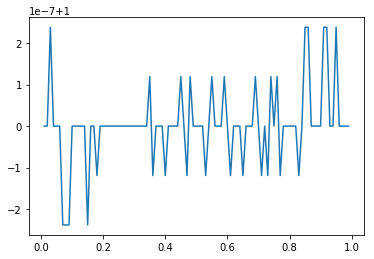

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch 
import pyro
import pyro.distributions as dist


one =  torch.ones([1])
d=dist.RelaxedBernoulli(probs =0.5*one,temperature=one)
x = torch.arange(0,1,0.01)
y = torch.exp(d.log_prob(x))
plt.plot(x.numpy(),y.numpy())